<a href="https://colab.research.google.com/github/kaisarfardin6620/Bangladeshi-Medicinal-Leaf-Classification/blob/main/Bangladshi_Medicinal_Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
base_path = '/content/drive/MyDrive/Dataset/MP_OG_resized_augmented_merged'

In [29]:
img_height, img_width = 224, 224
batch_size = 32

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [31]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

In [32]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

In [33]:
train_generator = train_datagen.flow_from_directory(
    base_path +'/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 14000 images belonging to 20 classes.


In [34]:
test_generator = train_datagen.flow_from_directory(
    base_path +'/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2000 images belonging to 20 classes.


In [35]:
val_generator = train_datagen.flow_from_directory(
    base_path +'/validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 4000 images belonging to 20 classes.


In [36]:
print('Number of training samples:', train_generator.samples)
print('Number of testing samples:', test_generator.samples)
print('Number of validation samples:', val_generator.samples)

Number of training samples: 14000
Number of testing samples: 2000
Number of validation samples: 4000


In [37]:
print('Class indices for traning data:', train_generator.class_indices)

Class indices for traning data: {'AI': 0, 'Bohera': 1, 'CA': 2, 'CG': 3, 'Devilbackbone': 4, 'HRS': 5, 'Haritoki': 6, 'JA': 7, 'KP': 8, 'Lemongrass': 9, 'MM': 10, 'Nayontara': 11, 'Neem': 12, 'OT': 13, 'PE': 14, 'Pathorkuchi': 15, 'TA': 16, 'Thankuni': 17, 'Tulsi': 18, 'Zenora': 19}


In [38]:
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

Classes: ['AI', 'Bohera', 'CA', 'CG', 'Devilbackbone', 'HRS', 'Haritoki', 'JA', 'KP', 'Lemongrass', 'MM', 'Nayontara', 'Neem', 'OT', 'PE', 'Pathorkuchi', 'TA', 'Thankuni', 'Tulsi', 'Zenora']


In [39]:
images, labels = next(train_generator)

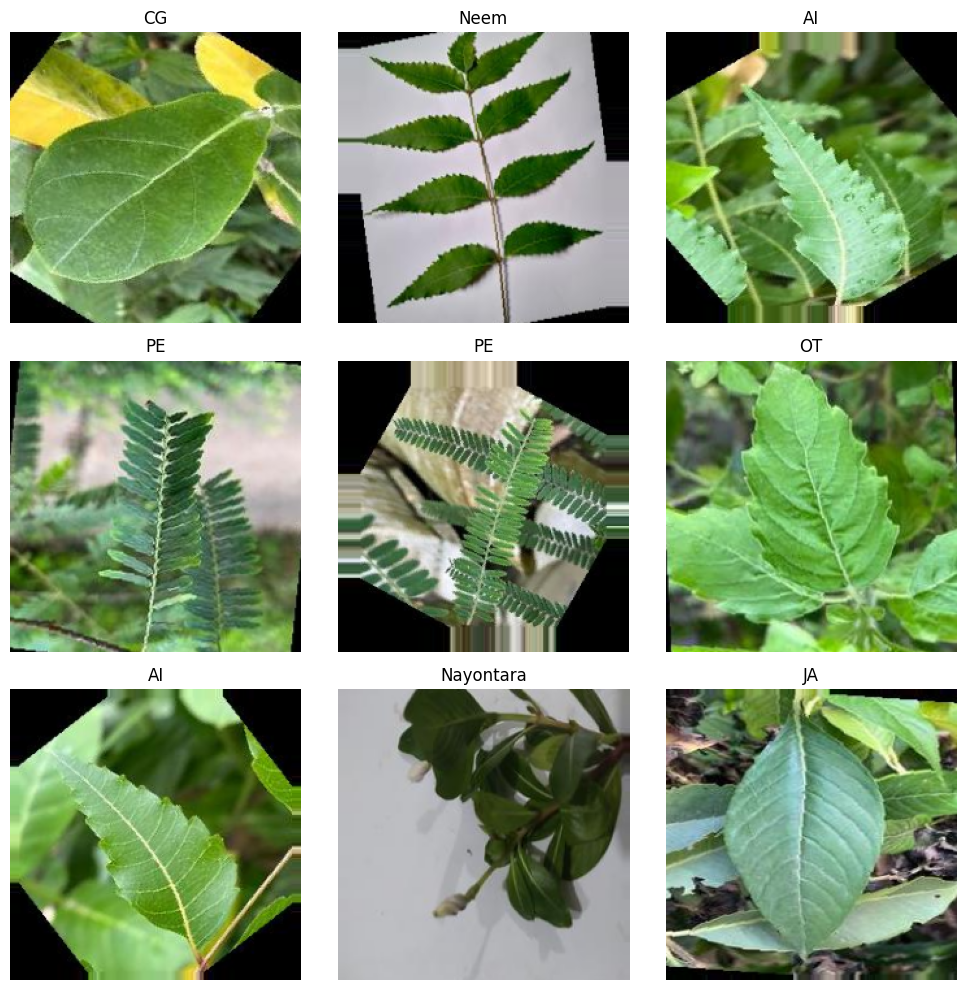

In [40]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(class_names[labels[i].argmax()])
  plt.axis('off')
plt.tight_layout()
plt.show()

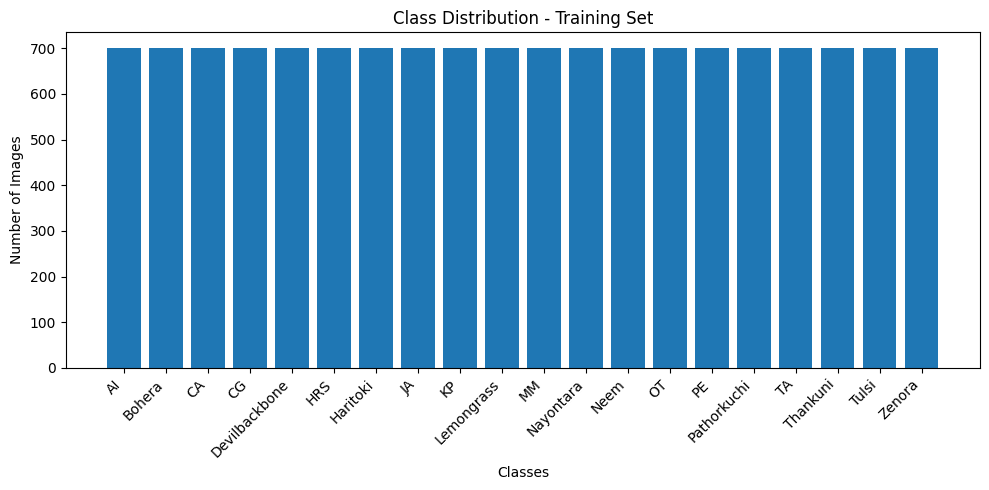

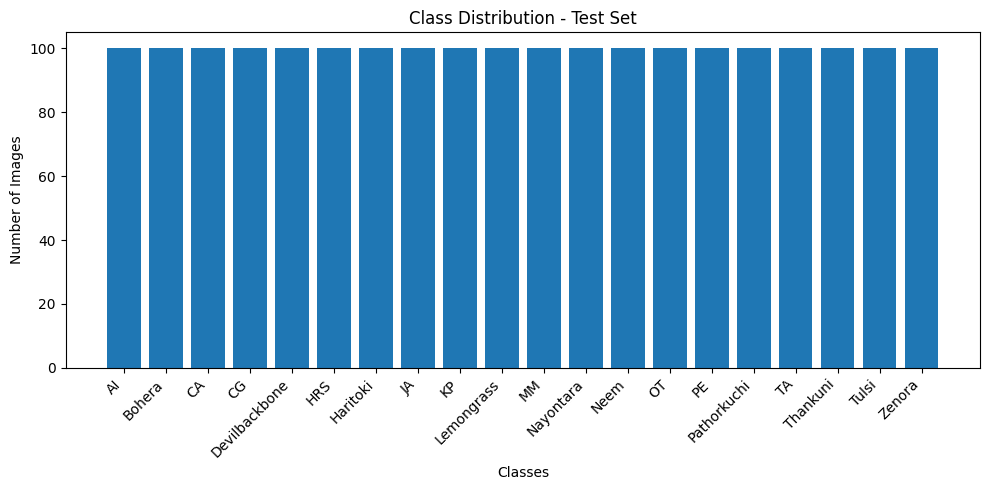

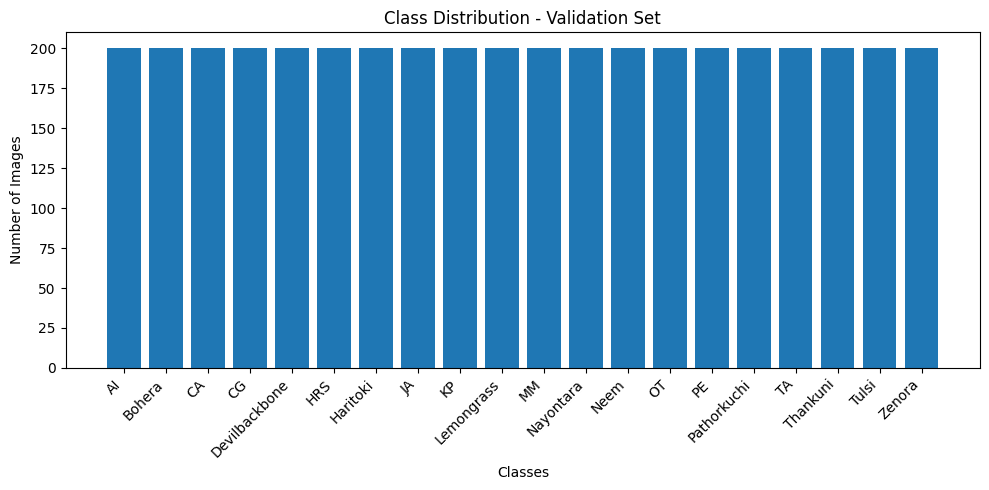

In [45]:
def plot_class_distribution(generator, title):
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    unique_classes, counts = np.unique(class_counts, return_counts=True)
    plt.figure(figsize=(10, 5))
    plt.bar(class_labels, counts)
    plt.title(f'Class Distribution - {title}')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_generator, 'Training Set')
plot_class_distribution(test_generator, 'Test Set')
plot_class_distribution(val_generator, 'Validation Set')

In [46]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [47]:
ann = Sequential()
ann.add(Flatten(input_shape=(img_height, img_width, 3)))
ann.add(Dense(512, activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(len(class_names), activation='softmax'))

In [48]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = ann.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 573s 18s/step - accuracy: 0.0542 - loss: 110.2767 - val_accuracy: 0.0573 - val_loss: 2.9935
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 465s 15s/step - accuracy: 0.0588 - loss: 3.0465 - val_accuracy: 0.0312 - val_loss: 2.9958
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 406s 13s/step - accuracy: 0.0463 - loss: 2.9957 - val_accuracy: 0.0469 - val_loss: 2.9953
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 388s 13s/step - accuracy: 0.0308 - loss: 3.0987 - val_accuracy: 0.0469 - val_loss: 2.9957


In [ ]:
ann_loss, ann_acc = ann.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', ann_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 99s 15s/step - accuracy: 0.0257 - loss: 2.9920
Test accuracy: 0.03125


In [49]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(len(class_names), activation='softmax'))

In [50]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 458s 15s/step - accuracy: 0.0621 - loss: 3.7714 - val_accuracy: 0.0625 - val_loss: 2.9593
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 366s 12s/step - accuracy: 0.0834 - loss: 2.9037 - val_accuracy: 0.1510 - val_loss: 2.7483
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 315s 10s/step - accuracy: 0.1452 - loss: 2.7293 - val_accuracy: 0.1771 - val_loss: 2.6242
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 322s 11s/step - accuracy: 0.1487 - loss: 2.6297 - val_accuracy: 0.1615 - val_loss: 2.5643
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.1695 - loss: 2.4973 - val_accuracy: 0.2031 - val_loss: 2.3496
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 314s 10s/step - accuracy: 0.2123 - loss: 2.3866 - val_accuracy: 0.2500 - val_loss: 2.3189
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.2042 - loss: 2.3238 - val_accuracy: 0.1875 - val_loss: 2.3762
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 225s 7s/step - accuracy: 0.2465 - loss: 2.2567 - val_accuracy: 0.234

In [ ]:
cnn_loss, cnn_acc = cnn.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', cnn_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 12s/step - accuracy: 0.2468 - loss: 2.0906
Test accuracy: 0.2708333432674408


In [51]:
def create_model(base_model, input_shape, num_classes):
  model = Sequential()
  model.add(base_model(weights='imagenet', include_top=False, input_shape=input_shape))
  for layer in model.layers[0].layers[-10:]:
    layer.trainable = True
  model.add(GlobalAveragePooling2D())
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [53]:
vgg16 = create_model(VGG16, (img_height, img_width, 3), len(class_names))

In [54]:
vgg16.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,146,196 (57.78 MB)

 Trainable params: 15,145,172 (57.77 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
history_vgg16 = vgg16.fit(train_generator,
                                      steps_per_epoch=train_generator.samples // batch_size,
                                      epochs=10, validation_data=val_generator,
                                      validation_steps=val_generator.samples // batch_size,
                                      callbacks=[early_stopping])

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2000s 64s/step - accuracy: 0.0433 - loss: 12.8473 - val_accuracy: 0.0521 - val_loss: 188.2212
Epoch 2/10
26/31 ━━━━━━━━━━━━━━━━━━━━ 5:01 60s/step - accuracy: 0.0866 - loss: 9.2215

In [ ]:
vgg16_loss, vgg16_acc = vgg16.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', vgg16_acc)

In [55]:
resnet50 = create_model(ResNet50, (img_height, img_width, 3), len(class_names))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [56]:
resnet50.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,805,652 (94.63 MB)

 Trainable params: 24,751,508 (94.42 MB)

 Non-trainable params: 54,144 (211.50 KB)

In [ ]:
history_resnet50 = resnet50.fit(train_generator,
                                      steps_per_epoch=train_generator.samples // batch_size,
                                      epochs=10, validation_data=val_generator,
                                      validation_steps=val_generator.samples // batch_size,
                                      callbacks=[early_stopping])

In [ ]:
resnet50_loss, resnet50_acc = resnet50.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', resnet50_acc)

In [57]:
inceptionv3 = create_model(InceptionV3, (img_height, img_width, 3), len(class_names))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [58]:
inceptionv3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,020,724 (87.82 MB)

 Trainable params: 22,985,268 (87.68 MB)

 Non-trainable params: 35,456 (138.50 KB)

In [ ]:
history_inceptionv3 = inceptionv3.fit(train_generator,
                                      steps_per_epoch=train_generator.samples // batch_size,
                                      epochs=10, validation_data=val_generator,
                                      validation_steps=val_generator.samples // batch_size,
                                      callbacks=[early_stopping])

In [ ]:
inceptionv3_loss, inceptionv3_acc = inceptionv3.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', inceptionv3_acc)

In [59]:
mobilenetv2 = create_model(MobileNetV2, (img_height, img_width, 3), len(class_names))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
mobilenetv2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,082,708 (11.76 MB)

 Trainable params: 3,047,572 (11.63 MB)

 Non-trainable params: 35,136 (137.25 KB)

In [ ]:
history_mobilenetv2 = mobilenetv2.fit(train_generator,
                                      steps_per_epoch=train_generator.samples // batch_size,
                                      epochs=10, validation_data=val_generator,
                                      validation_steps=val_generator.samples // batch_size,
                                      callbacks=[early_stopping])

Epoch 1/10
 74/437 ━━━━━━━━━━━━━━━━━━━━ 1:11:35 12s/step - accuracy: 0.1728 - loss: 15.0009

In [ ]:
mobilenetv2_loss, mobilenetv2_acc = mobilenetv2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', mobilenetv2_acc)

In [61]:
efficientnetb0 = create_model(EfficientNetB0, (img_height, img_width, 3), len(class_names))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [62]:
efficientnetb0.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,874,295 (18.59 MB)

 Trainable params: 4,831,248 (18.43 MB)

 Non-trainable params: 43,047 (168.16 KB)

In [ ]:
history_efficientnetb0 = efficientnetb0.fit(train_generator,
                                      steps_per_epoch=train_generator.samples // batch_size,
                                      epochs=10, validation_data=val_generator,
                                      validation_steps=val_generator.samples // batch_size,
                                      callbacks=[early_stopping])

In [ ]:
efficientnetb0_loss, efficientnetb0_acc = efficientnetb0.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', efficientnetb0_acc)